<font size = "5"> **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />


# Relrod - Sample Geometry and Excitation Error

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main//Diffraction/CH2_06b-Relrod.ipynb)
 
part of

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

**Spring 2026**<br>
by Gerd Duscher

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville


Background and methods to analysis and quantification of data acquired with transmission electron microscopes.




In [1]:
import sys
if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install ipympl
    
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np

__notebook_version__ = '2026.01.13'
print('notebook version: ', __notebook_version__)

notebook version:  2026.01.13


## Goals
Here we want to invesitate the influence of sample shape onto the diffraction pattern.

Generally, we have to consider the sample to be a thin disk-like shape, which in reciprocal space that is a rod-like shape.

It is this rod, together with dynamic scattering, that makes diffraction spots with excitation error possible.

In the following, we perform Fourier Transforms on disks with different ratios of height to radius.

## Make a disk shaped sample

Please, change ``width`` and ``height`` to see the effect in the Fourier Transform

In [2]:
radius = 50

height= 8

data = np.zeros([100,100,100])

x, y = np.mgrid[-data.shape[0]/2:data.shape[0]/2,-data.shape[1]/2:data.shape[1]/2]

data[x**2+y**2<radius**2, int(data.shape[2]/2-height/2): int(data.shape[2]/2+1+height/2)  ] = 1
X, Y, Z = np.where(data>0)

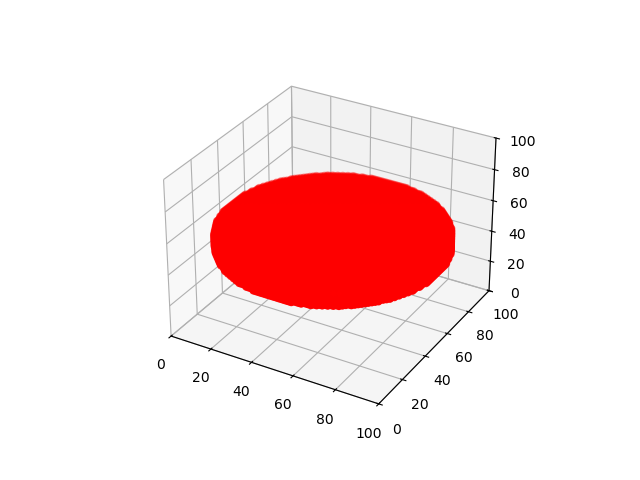

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.scatter(X, Y, Z, color='r', label='real space')
#ax.scatter(Xf, Yf, Zf, color='b', label='reciprocal space')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);

## Perform Fourier transform

In [4]:
r_data = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(data)))

r_data = np.log(1+np.abs(r_data))
r_data[r_data<r_data.max()*.8] = 0
r_data[r_data>0]=1

Xf, Yf, Zf = np.where(r_data>0)

## Plot Data Fast

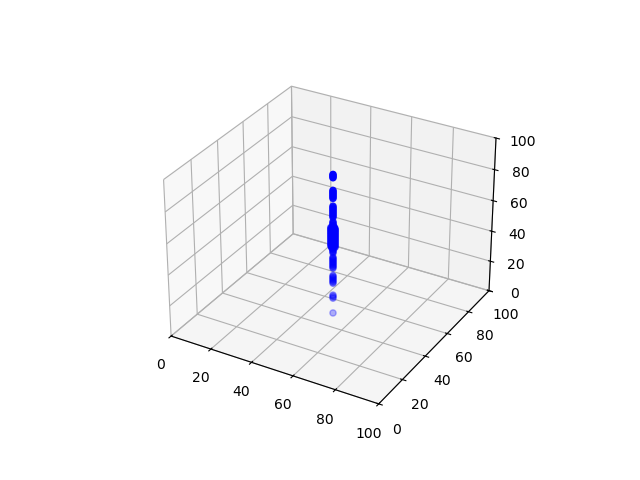

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.scatter(X, Y, Z, color='r', label='real space')
ax.scatter(Xf, Yf, Zf, color='b', label='reciprocal space')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);

## Slow Plotting Routine

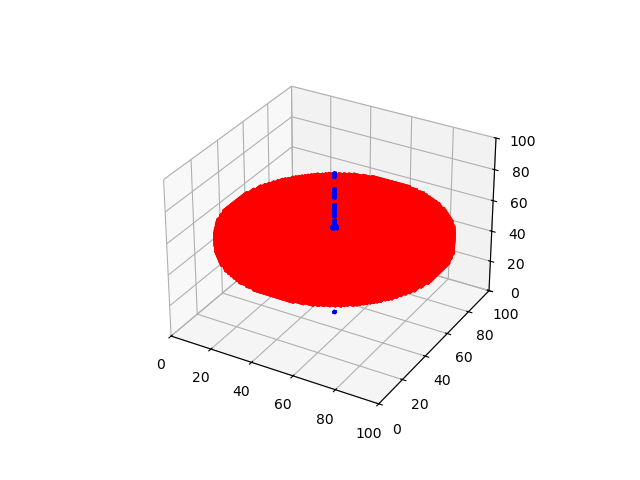

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.voxels(r_data, color='b')
ax.voxels(data, color='r')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);


## Shape of the Relrod: 

The relrod profile is given by a top-hat like function and oscillates with:
$$ \left(\frac{sin(x)}{x} \right)^2$$

The periodicity is dependent on sample thickness and material (structure factor).

According to Reimer (equ. 7.25), the intensity of a Bragg reflection $\vec{g}$ is given by:
$$I_g = \left(\frac{\pi}{\xi_g}\right)^2 \frac{\sin^2(\pi\ s_{\rm eff_g}\ t)}{(\pi s_{\rm eff_g})^2}$$

extinction_distance (Reimer equ. 7.23): $ \xi_g = \frac{\pi V}{\lambda F_g}$<br>
effective excitation error:  $ s_{\rm eff_g} = \sqrt{s_g^2 + \xi_g^{-2}}$

with:<br>
$t$: thickness <br>
$s_g$: excitation error <br>
$F_g$: structure factor <br>
$V$: volume of unit cell <br>
$\lambda$: wavelength

You can try out the influence of thickness in the code cell below.

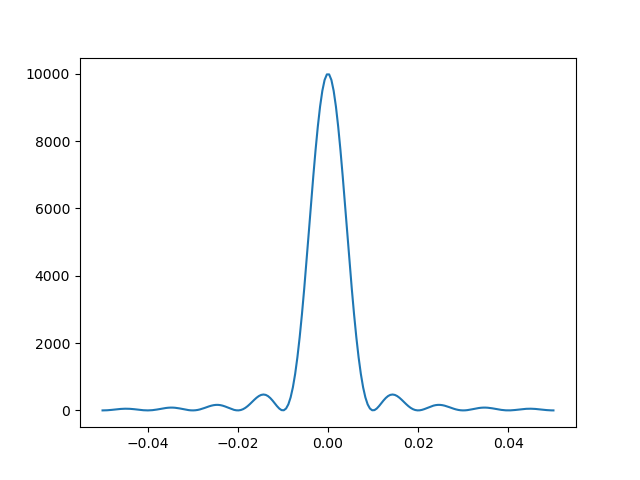

In [6]:
# ----- Input ---------
thickness = 100 # a.u.; order of magnitude is Angstrom 
# ---------------------
s_eff = np.linspace(-0.05, 0.05, 200)

i_g = np.real(np.sin(np.pi * s_eff * thickness)**2 / (np.pi * s_eff)**2)
plt.figure()
plt.plot(s_eff, i_g)

### Code in pyTEMlib
The function to calculate this thickness-dependent intensity with excitation error $s_g$ is given below.

Compare the code to equation from above:
$$I_g = \left(\frac{\pi}{\xi_g}\right)^2 \frac{\sin^2(\pi\ s_{\rm eff_g}\ t)}{(\pi s_{\rm eff_g})^2}$$

In [12]:
def intensity_with_thickness(thickness, atoms, k0_magnitude, f_allowed, sg):
    """ Calculate intensity of diffracted beams according to Reimer&Kohl equ.7.25 
    
    Parameters:
    ----------
    thickness: float
        thickness of sample in Angstrom
    atoms: ase.Atoms
        structure of crystal
    k0_magnitude: float
        incident wave vector in 1/A
    f_allowed: np.array (1dim)
        structure factors (non-zero =  allowed)
    sg: np.array (1dm)
        excitation errors 
    Returns:
    --------
    i_g: np.array (1dim)
        intensities of g vectors at excitation error sg
    """
    if thickness < 0:
        return None
    # Calculate Extinction Distance  Reimer 7.23
    # - makes only sense for non-zero structure_factor
    xi_g = np.real(np.pi * atoms.cell.volume * k0_magnitude / f_allowed)
    s_eff = np.sqrt(sg**2 + xi_g**-2)

    i_g = np.real(np.pi**2 / xi_g**2 * np.sin(np.pi * s_eff * thickness)**2 / (np.pi * s_eff)**2)   
    return i_g

## Conclusion

The shape of the Fourier Transform of the sample is called **relrod**.

This relrod replaces any point in recirpocal lattice.


We can conclude a few points from this notebook:
- The relrod is **perpendicular to the sample**
- The relrod is the major contribution to the excitation error. 


The surface of the sample may not be exactly perpendicular to the zone axis and has to be considered in our calulations
